In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


# Dataset Analysis


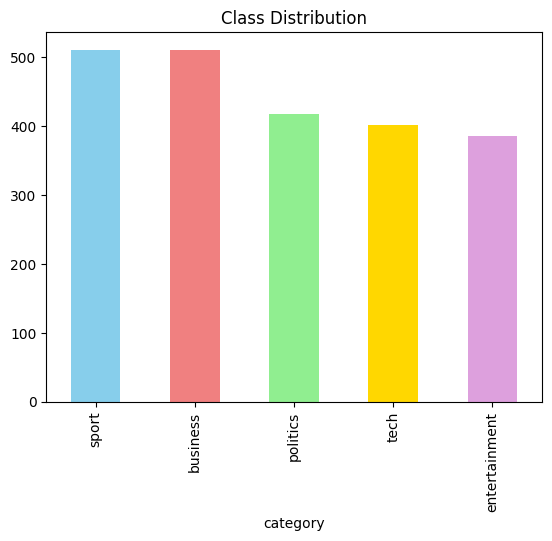

In [ ]:
df = pd.read_csv("bbc-text.csv")

# Define a list of colors for the categories
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

df['category'].value_counts().plot(kind='bar', color=colors)
plt.title("Class Distribution")
plt.show()


In [ ]:
# Keeping only sport & politics
df = df[df['category'].isin(['sport','politics'])]

df.head()

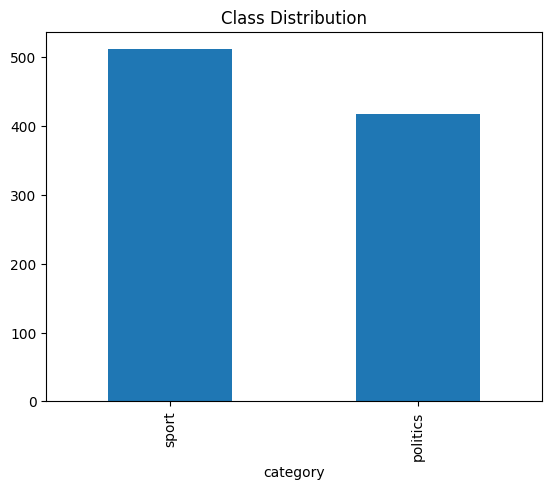

In [ ]:
df['category'].value_counts()


df['category'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()



In [ ]:
df['category'].value_counts()

,count
category,
sport,511
politics,417


In [ ]:
df['length'] = df['text'].apply(len)
df['length'].describe()


/tmp/ipython-input-1950198642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].apply(len)


,length
count,928.000000
mean,2248.496767
std,1449.235929
min,501.000000
25%,1399.000000
50%,2012.500000
75%,2860.000000
max,25483.000000


In [ ]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(max_iter=5000),
    "Random Forest": RandomForestClassifier()
}


In [ ]:
X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16)


# Evaluating Models

In [ ]:
def evaluate(vectorizer, name):

    # Converting text into feature vectors
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    results = {}

    # Training and evaluating each model
    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        pred = model.predict(X_test_vec)

        # Storing accuracy
        results[model_name] = accuracy_score(y_test, pred)

        # Showing confusion matrix only for TF-IDF
        if name == "TFIDF":
            cm = confusion_matrix(y_test, pred)
            disp = ConfusionMatrixDisplay(cm)
            disp.plot()
            plt.title(f"Confusion Matrix - TFIDF and {model_name}")
            plt.show()

    return results


In [ ]:
bow_results = evaluate(
    CountVectorizer(stop_words='english'),
    "BOW"
)


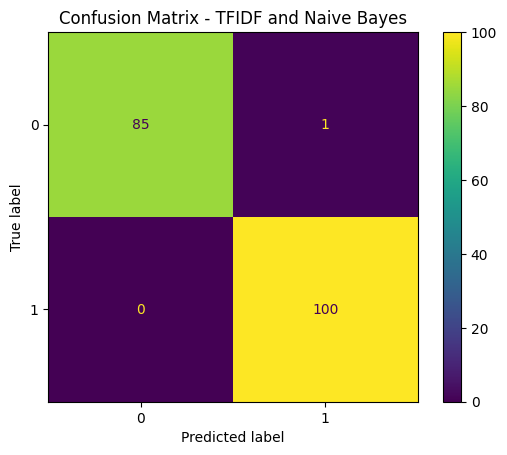

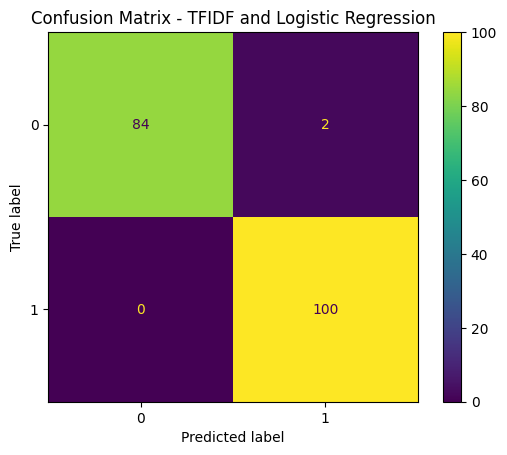

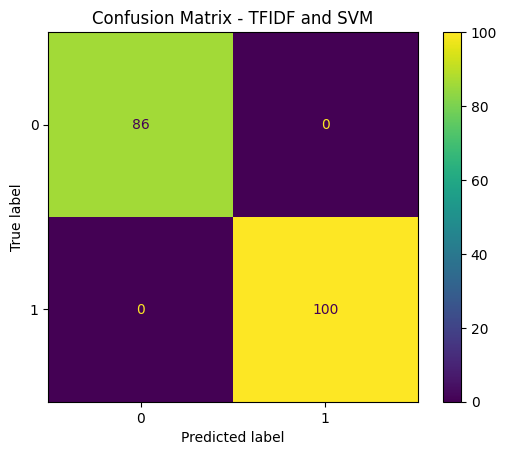

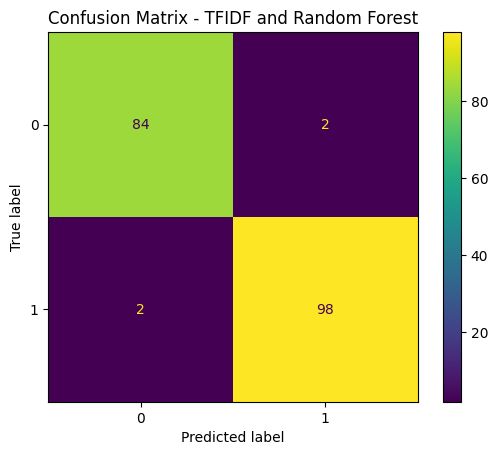

In [ ]:
tfidf_results = evaluate(
    TfidfVectorizer(stop_words='english'),
    "TFIDF"
)


In [ ]:
ngram_results = evaluate(
    CountVectorizer(stop_words='english', ngram_range=(1,2)),
    "NGRAM"
)


In [ ]:
comparison = pd.DataFrame([
    bow_results,
    tfidf_results,
    ngram_results
], index=["Bag of Words","TF-IDF","N-grams"])

comparison


,Naive Bayes,Logistic Regression,SVM,Random Forest
Bag of Words,0.994624,0.983871,0.983871,0.983871
TF-IDF,0.994624,0.989247,1.000000,0.978495
N-grams,1.000000,0.983871,0.989247,0.978495


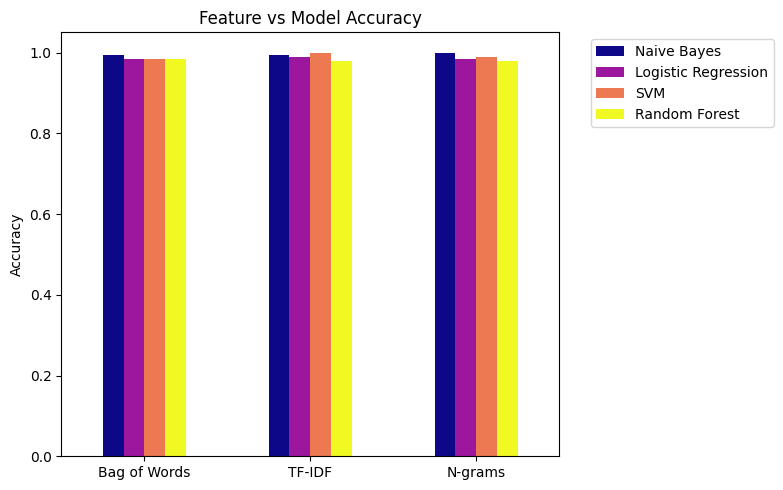

In [ ]:
comparison.plot(kind='bar', figsize=(8,5), cmap='plasma')

plt.title("Feature vs Model Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()